In [1]:
import pandas as pd
import numpy as np
ride_sharing = pd.read_csv('datasets/ride_sharing_new.csv', index_col=0)

# https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes

In [6]:
# convert data type str->cat

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')
assert ride_sharing['user_type_cat'].dtype == 'category'
print(ride_sharing['user_type_cat'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


In [7]:
# converting data type str->int

ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes') # Strip duration of minutes - string to int
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')
assert ride_sharing['duration_time'].dtype == 'int'
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

          duration duration_trim  duration_time
0       12 minutes           12              12
1       24 minutes           24              24
2        8 minutes            8               8
3        4 minutes            4               4
4       11 minutes           11              11
5       10 minutes           10              10
6       16 minutes           16              16
7        9 minutes            9               9
8       21 minutes           21              21
9        5 minutes            5               5
10      19 minutes           19              19
11       6 minutes            6               6
12       7 minutes            7               7
13     187 minutes          187             187
14      13 minutes           13              13
15       4 minutes            4               4
16      32 minutes           32              32
17       5 minutes            5               5
18      16 minutes           16              16
19      17 minutes           17         

In [8]:
# limit range for values

ride_sharing.loc[ride_sharing['tire_sizes'] > 120, :] = 120

0         12
1         24
2          8
3          4
4         11
5         10
6         16
7          9
8         21
9          5
10        19
11         6
12         7
13       187
14        13
15         4
16        32
17         5
18        16
19        17
20        16
21        11
22        10
23         3
24        11
25         3
26        12
27         7
28         5
29         6
        ... 
25730      1
25731     12
25732     24
25733     21
25734      1
25735      2
25736     13
25737     13
25738     19
25739     18
25740     18
25741     12
25742      6
25743     10
25744      4
25745     17
25746      4
25747     31
25748     31
25749     15
25750     15
25751     15
25752     15
25753      9
25754      9
25755     11
25756     10
25757     14
25758     14
25759     29
Name: duration_time, Length: 25760, dtype: int32

In [13]:
# uniqueness constrains

# Find duplicates
duplicates = ride_sharing.duplicated(subset='ride_id', keep=False)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicated#pandas.DataFrame.duplicated
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')
print(duplicated_rides[['ride_id','duration','user_birth_year']])

# replace duplicates with agg data
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()
statistics = {'user_birth_year': 'min', 'duration': 'mean'}
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

KeyError: Index(['ride_id'], dtype='object')

In [23]:
# membership contrains

airlines = pd.read_csv('datasets/airlines_final.csv', index_col=0)
categories = pd.DataFrame(['Clean', 'Average', 'Somewhat clean', 'Dirty'], columns=['cleanliness'])

cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness']) # set of differences between dfs
cat_clean_rows = airlines['cleanliness'].isin(cat_clean) # check which rows have incorrect values 
print(airlines[cat_clean_rows]) # print rows with incorrect data
print(airlines[~cat_clean_rows]) # print rows with correct data

        id        day         airline     destination            dest_region  \
52    1635   Thursday      KOREAN AIR           SEOUL                   Asia   
153   2262   Saturday          UNITED     BAKERSFIELD                West US   
189    529   Thursday        EMIRATES           DUBAI            Middle East   
371   1897     Monday       LUFTHANSA          MUNICH                 Europe   
447    557   Thursday        EMIRATES           DUBAI            Middle East   
465   1196    Tuesday       SOUTHWEST       LAS VEGAS                West US   
473   3093    Tuesday          UNITED         SPOKANE                West US   
567   1353    Tuesday     UNITED INTL        SHANGHAI                   Asia   
747   1898     Monday       LUFTHANSA          MUNICH                    eur   
839   1276   Thursday  CHINA SOUTHERN           WUHAN                   Asia   
1087   649     Friday     UNITED INTL          MUNICH                    eur   
1116  1199    Tuesday       SOUTHWEST   

In [24]:
# Categorical variables
# removing white spaces and replacing names

print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})
airlines['dest_size'] = airlines['dest_size'].str.strip()
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']


In [27]:
# add range column + map values to classify

label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}
airlines['day_week'] = airlines['day'].replace(mappings)

In [ ]:
# cleaning text data

# replace
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

#check lenght
resp_length = airlines['survey_response'].str.len()
airlines_survey = airlines[resp_length > 40]
assert airlines_survey['survey_response'].str.len().min() > 40
print(airlines_survey['survey_response'])

In [ ]:
# uniformity

# uniform currency
acct_eu = banking['acct_cur'] == 'euro'
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1
banking.loc[acct_eu, 'acct_cur'] = 'dollar'
assert banking['acct_cur'].unique() == 'dollar'

In [2]:
# different date formats
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

banking = pd.read_csv('datasets/banking_dirty.csv')

pd.to_datetime(pd.DataFrame({'2019-01-01'}, columns=['date'])['date']).dt.strftime("%d-%m-%Y") # change date format

# convert to datetime, infer datetime format, set NaT for errors
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           infer_datetime_format = True,
                                           errors = 'coerce') 

In [5]:
# get year from datetime
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

In [8]:
# cross field validation

# check if sum of columns' values are in line with other column
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']
# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']
# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [ ]:
# check if dates are in line with age

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year
# Find rows where age column == ages_manual
age_equ = ages_manual == banking['age']
# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]
# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

In [7]:
!pip install missingno

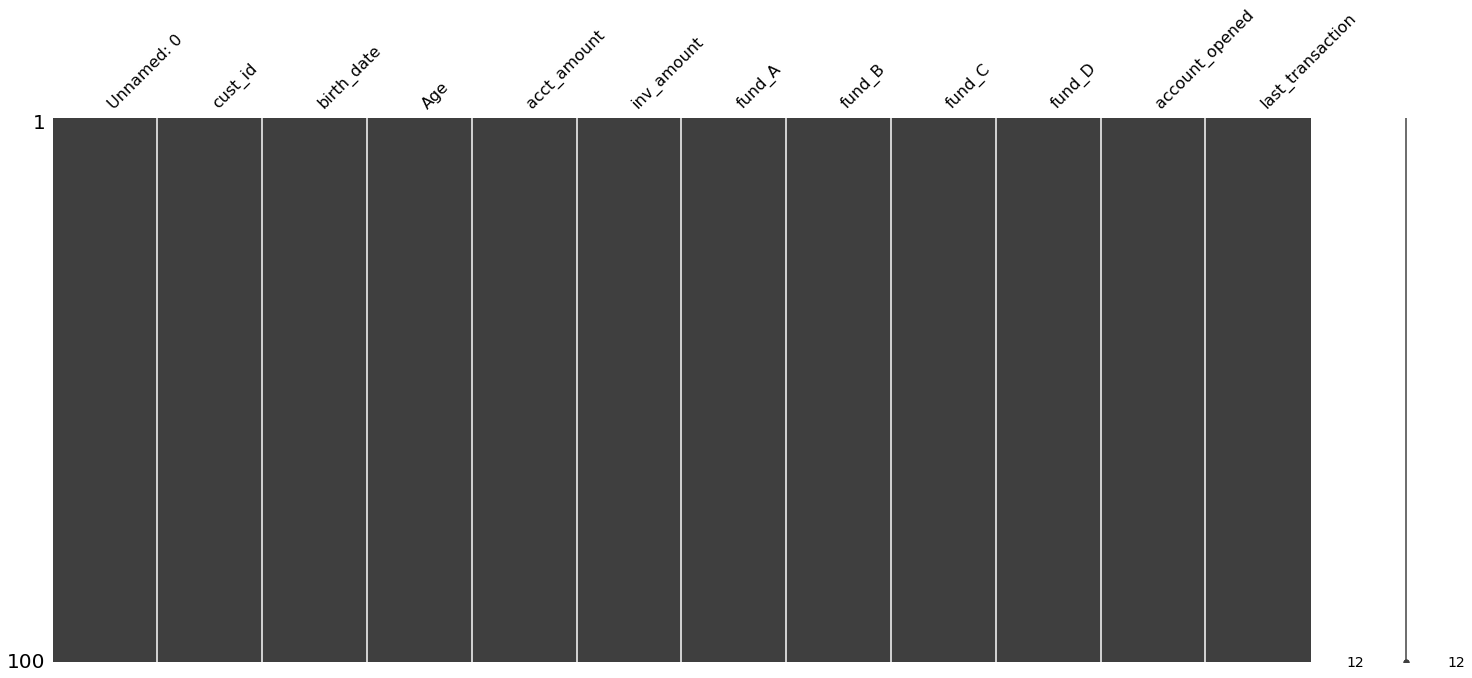

In [9]:
# Data completeness

#check how many NAs in each column
banking.isna().sum()

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values('age')
msno.matrix(banking_sorted)
plt.show()

In [10]:
# missing data

# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])
# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5
# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})
# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


In [12]:
!pip install fuzzywuzzy

In [16]:
# Import process from fuzzywuzzy
from fuzzywuzzy import process
# https://towardsdatascience.com/string-matching-with-fuzzywuzzy-e982c61f8a84
    
restaurants = pd.DataFrame({'asian', 'Asian', 'American', 'america', 'italian', 'italia'}, columns = ['cuisine_type'])

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()
# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))
# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))
# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('Asian', 100), ('italian', 67), ('American', 62), ('italia', 55), ('america', 50)]
[('American', 100), ('america', 93), ('asian', 62), ('Asian', 62), ('italian', 53), ('italia', 43)]
[('italian', 100), ('italia', 92), ('asian', 67), ('Asian', 67), ('American', 40), ('america', 29)]


In [17]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >=80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants['cuisine_type'] == match[0], 'cuisine_type'] = 'italian'
    
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))
  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
# Inspect the final result
print(restaurants['cuisine_type'].unique())